In [2]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/is_lab4')

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
from keras.datasets import imdb

vocabulary_size = 5000
index_from = 3

(X_train, y_train), (X_test, y_test) = imdb.load_data(
    path="imdb.npz",
    num_words=vocabulary_size,
    skip_top=0,
    maxlen=None,
    seed=23,
    start_char=1,
    oov_char=2,
    index_from=index_from
    )

print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Shape of X train: (25000,)
Shape of y train: (25000,)
Shape of X test: (25000,)
Shape of y test: (25000,)


In [5]:
# создание словаря для перевода индексов в слова
# заргузка словаря "слово:индекс"
word_to_id = imdb.get_word_index()
# уточнение словаря
word_to_id = {key:(value + index_from) for key,value in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3
# создание обратного словаря "индекс:слово"
id_to_word = {value:key for key,value in word_to_id.items()}



1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [8]:
print(X_train[23])
print('len:',len(X_train[23]))

[1, 14, 20, 9, 290, 149, 48, 25, 358, 2, 120, 318, 302, 50, 26, 49, 221, 2057, 10, 10, 1212, 39, 15, 45, 801, 2, 2, 363, 2396, 7, 2, 209, 2327, 283, 8, 4, 425, 10, 10, 45, 24, 290, 3613, 972, 4, 65, 198, 40, 3462, 1224, 2, 23, 6, 4457, 225, 24, 76, 50, 8, 895, 19, 45, 164, 204, 5, 24, 55, 318, 38, 92, 140, 11, 18, 4, 65, 33, 32, 43, 168, 33, 4, 302, 10, 10, 17, 47, 77, 1046, 12, 188, 6, 117, 2, 33, 4, 130, 2, 4, 2, 7, 87, 3709, 2199, 7, 35, 2504, 5, 33, 211, 320, 2504, 132, 190, 48, 25, 2754, 4, 1273, 2, 45, 6, 1682, 8, 2, 42, 24, 8, 2, 10, 10, 32, 11, 32, 45, 6, 542, 3709, 22, 290, 319, 18, 15, 1288, 5, 15, 584]
len: 146


In [9]:
review_as_text = ' '.join(id_to_word[id] for id in X_train[23])
print(review_as_text)
print('len:',len(review_as_text))

<START> this movie is worth watching if you enjoy <UNK> over special effects there are some interesting visuals br br aside from that it's typical <UNK> <UNK> hollywood fare of <UNK> without substance true to the title br br it's not worth picking apart the story that's like performing brain <UNK> on a dinosaur there's not much there to begin with it's nothing original and not very special so don't go in for the story at all just look at the effects br br as has been mentioned it got a little <UNK> at the end <UNK> the <UNK> of great fx treatment of an invisible and at times half invisible man however if you ignore the standard <UNK> it's a sight to <UNK> or not to <UNK> br br all in all it's a decent fx film worth seeing for that purpose and that alone
len: 763


In [10]:
print('MAX Len: ',len(max(X_train, key=len)))
print('MIN Len: ',len(min(X_train, key=len)))

MAX Len:  2494
MIN Len:  11


In [11]:
# предобработка данных
from tensorflow.keras.utils import pad_sequences
max_words = 500
X_train = pad_sequences(X_train, maxlen=max_words, value=0, padding='pre', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_words, value=0, padding='pre', truncating='post')

In [12]:
print('MAX Len: ',len(max(X_train, key=len)))
print('MIN Len: ',len(min(X_train, key=len)))

MAX Len:  500
MIN Len:  500


In [13]:
print(X_train[23])
print('len:',len(X_train[23]))

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [17]:
review_as_text = ' '.join(id_to_word[id] for id in X_train[23])
print(review_as_text)
print('len:',len(review_as_text))

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

In [18]:
# вывод данных
print('X train: \n',X_train)
print('X train: \n',X_test)

# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of X test:', X_test.shape)

X train: 
 [[   0    0    0 ...    6   52  106]
 [   0    0    0 ...   87   22  231]
 [   0    0    0 ...    6  158  158]
 ...
 [   0    0    0 ... 1005    4 1630]
 [   0    0    0 ...    9    6  991]
 [   0    0    0 ...    7   32   58]]
X train: 
 [[   0    0    0 ...    4    2    2]
 [   0    0    0 ...    6    2  123]
 [   0    0    0 ...    2   11  831]
 ...
 [   1   14  402 ...  819   45  131]
 [   0    0    0 ...   17 1540    2]
 [   1   17    6 ... 1026  362   37]]
Shape of X train: (25000, 500)
Shape of X test: (25000, 500)


In [19]:
embed_dim = 32
lstm_units = 64

model = Sequential()
model.add(layers.Embedding(input_dim=vocabulary_size, output_dim=embed_dim, input_length=max_words, input_shape=(max_words,)))
model.add(layers.LSTM(lstm_units))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 32)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,897 (722.25 KB)

 Trainable params: 184,897 (722.25 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# компилируем и обучаем модель
batch_size = 64
epochs = 3
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.6255 - loss: 0.6261 - val_accuracy: 0.8294 - val_loss: 0.3905
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.8643 - loss: 0.3334 - val_accuracy: 0.8626 - val_loss: 0.3467
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8877 - loss: 0.2905 - val_accuracy: 0.8722 - val_loss: 0.3317


In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8640 - loss: 0.3313

Test accuracy: 0.8622000217437744


In [22]:
#значение метрики качества классификации на тестовых данных
print(f"\nTest accuracy: {test_acc}")


Test accuracy: 0.8622000217437744


In [23]:
#отчет о качестве классификации тестовой выборки
y_score = model.predict(X_test)
y_pred = [1 if y_score[i,0]>=0.5 else 0 for i in range(len(y_score))]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels = [0, 1], target_names=['Negative', 'Positive']))

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step
              precision    recall  f1-score   support

    Negative       0.83      0.91      0.87     12500
    Positive       0.90      0.81      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.87      0.86      0.86     25000
weighted avg       0.87      0.86      0.86     25000



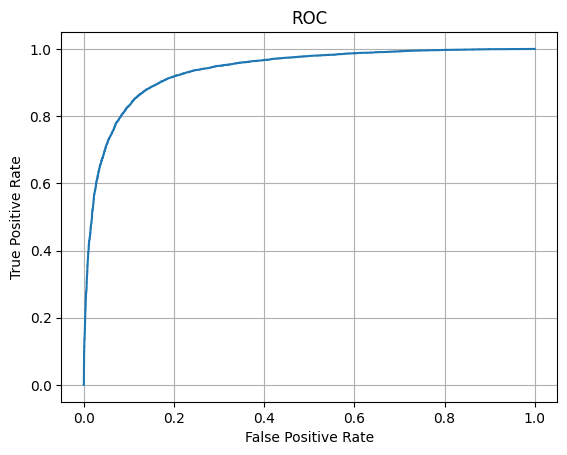

AUC ROC: 0.9370553728000001


In [24]:
#построение ROC-кривой и AUC ROC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_score)
plt.plot(fpr, tpr)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('AUC ROC:', auc(fpr, tpr))